In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,127 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import sidetable as stb
import io
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv("top_10.csv")

In [ ]:
df

,Unnamed: 0,날짜,순위,게임명,카테고리
0,0,2019-01-01,1,리니지M,롤플레잉
1,1,2019-01-01,2,블레이드&소울 레볼루션,롤플레잉
2,2,2019-01-01,3,검은사막 모바일,롤플레잉
3,3,2019-01-01,4,리니지2 레볼루션,롤플레잉
4,4,2019-01-01,5,뮤오리진2,롤플레잉
...,...,...,...,...,...
16203,16203,2022-06-14,6,던전앤파이터 모바일,롤플레잉
16204,16204,2022-06-14,7,히어로즈 테일즈,롤플레잉
16205,16205,2022-06-14,8,원신,어드벤처
16206,16206,2022-06-14,9,FIFA ONLINE 4 M by EA SPORTS™,스포츠


In [ ]:
df = df.drop('Unnamed: 0', axis=1)
df

,날짜,순위,게임명,카테고리
0,2019-01-01,1,리니지M,롤플레잉
1,2019-01-01,2,블레이드&소울 레볼루션,롤플레잉
2,2019-01-01,3,검은사막 모바일,롤플레잉
3,2019-01-01,4,리니지2 레볼루션,롤플레잉
4,2019-01-01,5,뮤오리진2,롤플레잉
...,...,...,...,...
16203,2022-06-14,6,던전앤파이터 모바일,롤플레잉
16204,2022-06-14,7,히어로즈 테일즈,롤플레잉
16205,2022-06-14,8,원신,어드벤처
16206,2022-06-14,9,FIFA ONLINE 4 M by EA SPORTS™,스포츠


In [ ]:
new_df = pd.DataFrame(df['게임명'].value_counts())
new_df

,게임명
리니지M,1620
리니지2M,1289
기적의 검,1276
라이즈 오브 킹덤즈,1058
블레이드&소울 레볼루션,963
...,...
아리엘,1
블리치 - 사신 격투,1
R0,1
Pokémon GO,1


In [ ]:
new_df = new_df.reset_index(drop=False)
new_df

,index,게임명
0,리니지M,1620
1,리니지2M,1289
2,기적의 검,1276
3,라이즈 오브 킹덤즈,1058
4,블레이드&소울 레볼루션,963
...,...,...
104,아리엘,1
105,블리치 - 사신 격투,1
106,R0,1
107,Pokémon GO,1


In [ ]:
new_df.columns = ['게임명', '게임별 랭크 횟수']
new_df.head()

,게임명,게임별 랭크 횟수
0,리니지M,1620
1,리니지2M,1289
2,기적의 검,1276
3,라이즈 오브 킹덤즈,1058
4,블레이드&소울 레볼루션,963


In [ ]:
df2 = pd.merge(df, new_df, on='게임명', how='left')
df2.head(10)

,날짜,순위,게임명,카테고리,게임별 랭크 횟수
0,2019-01-01,1,리니지M,롤플레잉,1620
1,2019-01-01,2,블레이드&소울 레볼루션,롤플레잉,963
2,2019-01-01,3,검은사막 모바일,롤플레잉,311
3,2019-01-01,4,리니지2 레볼루션,롤플레잉,708
4,2019-01-01,5,뮤오리진2,롤플레잉,133
5,2019-01-01,6,브롤스타즈,액션,370
6,2019-01-01,7,"왕이되는자 - 서민에서 왕까지, 세상을 흔드는 자",롤플레잉,88
7,2019-01-01,8,에픽세븐,롤플레잉,23
8,2019-01-01,9,세븐나이츠,롤플레잉,38
9,2019-01-01,10,신명,롤플레잉,110


In [ ]:
df3 = pd.DataFrame(df2['게임별 랭크 횟수'].sort_values(ascending=False))
df3.head(30)

,게임별 랭크 횟수
0,1620
1439,1620
12900,1620
9210,1620
1479,1620
4200,1620
12910,1620
9200,1620
12920,1620
4210,1620


In [ ]:
df3 = df3.index([0,1439,112900,9200,1479,4200,12910,9200,12920,4210], dtype='object')
df3

TypeError: ignored

In [ ]:
df_c = pd.DataFrame(df['카테고리'].value_counts())
df_c

,카테고리
롤플레잉,12594
전략,1599
액션,545
어드벤처,518
자동차 경주,402
스포츠,284
카지노,213
보드,53


In [ ]:
df_c = df_c.reset_index(drop=False)
df_c.columns = ['카테고리', '카테고리별 랭크 횟수']
df_c

,카테고리,카테고리별 랭크 횟수
0,롤플레잉,12594
1,전략,1599
2,액션,545
3,어드벤처,518
4,자동차 경주,402
5,스포츠,284
6,카지노,213
7,보드,53


In [ ]:
dfc = df_c.copy()

In [ ]:
df_p = dfc.stb.freq(['카테고리'], value='카테고리별 랭크 횟수')
df_p

,카테고리,카테고리별 랭크 횟수,percent,cumulative_카테고리별 랭크 횟수,cumulative_percent
0,롤플레잉,12594,77.702369,12594,77.702369
1,전략,1599,9.865499,14193,87.567868
2,액션,545,3.362537,14738,90.930405
3,어드벤처,518,3.195953,15256,94.126357
4,자동차 경주,402,2.480257,15658,96.606614
5,스포츠,284,1.752221,15942,98.358835
6,카지노,213,1.314166,16155,99.673001
7,보드,53,0.326999,16208,100.000000


In [ ]:
df_p = df_p.drop('cumulative_카테고리별 랭크 횟수', axis=1)
df_p.head()

,카테고리,카테고리별 랭크 횟수,percent,cumulative_percent
0,롤플레잉,12594,77.702369,77.702369
1,전략,1599,9.865499,87.567868
2,액션,545,3.362537,90.930405
3,어드벤처,518,3.195953,94.126357
4,자동차 경주,402,2.480257,96.606614


In [ ]:
df_p = df_p.drop('cumulative_percent', axis=1)
df_p.head()

,카테고리,카테고리별 랭크 횟수,percent
0,롤플레잉,12594,77.702369
1,전략,1599,9.865499
2,액션,545,3.362537
3,어드벤처,518,3.195953
4,자동차 경주,402,2.480257


In [ ]:
pd.options.display.float_format = '{:.1f}'.format
dfp = df_p.rename(columns={'percent':'비율'})
dfp

,카테고리,카테고리별 랭크 횟수,비율
0,롤플레잉,12594,77.7
1,전략,1599,9.9
2,액션,545,3.4
3,어드벤처,518,3.2
4,자동차 경주,402,2.5
5,스포츠,284,1.8
6,카지노,213,1.3
7,보드,53,0.3


In [ ]:
# 시각화 배경을 회색 그리드로 보여주는 옵션 설정
sns.set(style='darkgrid')

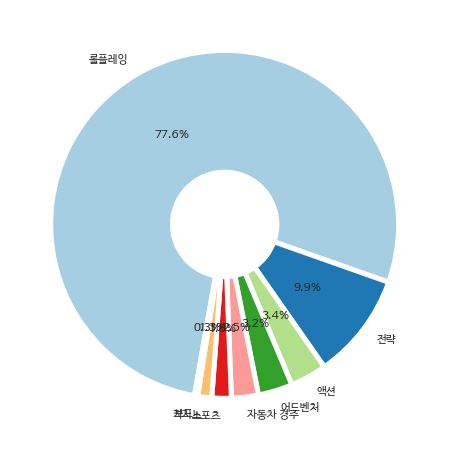

In [ ]:
sns.set_palette("Paired")
plt.figure(figsize=(15, 8)) 
plt.rc('font', family='NanumBarunGothic')
ratio = [77.7, 9.9, 3.4, 3.2, 2.5, 1.8, 1.3, 0.3]
labels = ["롤플레잉", "전략", "액션", "어드벤처", "자동차 경주", "스포츠", "카지노", "보드"]
#colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}


plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
plt.show()

<Figure size 1080x576 with 0 Axes>

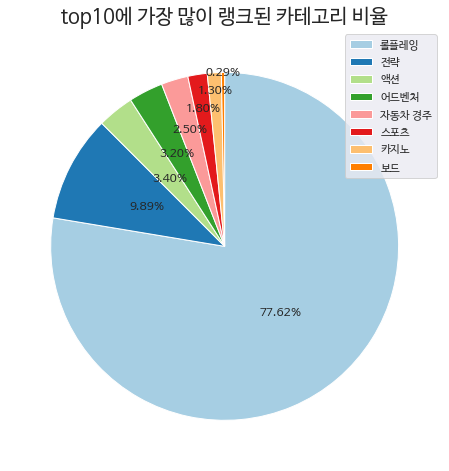

In [ ]:
plt.figure(figsize=(15, 8)) 
 
## 데이터 준비
#colors = ['red','yellow','purple','burlywood','lightcoral'] ## 색상
labels =  ["롤플레잉", "전략", "액션", "어드벤처", "자동차 경주", "스포츠", "카지노", "보드"] ## 라벨
frequency = [77.7, 9.9, 3.4, 3.2, 2.5, 1.8, 1.3, 0.3] ## 빈도
 
## 데이터 라벨, 빈도수, 색상을 빈도수를 기준으로 정렬해야한다.
labels_frequency = zip(labels,frequency) 
labels_frequency = sorted(labels_frequency,key=lambda x: x[1],reverse=True)
 
sorted_labels = [x[0] for x in labels_frequency] ## 정렬된 라벨
sorted_frequency = [x[1] for x in labels_frequency] ## 정렬된 빈도수
#sorted_colors = [x[2] for x in labels_frequency] ## 정렬된 색상
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(sorted_frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False ## 시계방향으로 그려짐
       #colors = sorted_colors, ## 색상 지정
       )
 
total = np.sum(frequency) ## 빈도수 합
 
threshold = 5
sum_pct = 0 ## 퍼센티지
count_less_5pct = 0 ## 5%보다 작은 라벨의 개수
spacing = 0.1
for i,l in enumerate(sorted_labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 파이의 중심 좌표
    
    ## 비율 상한선보다 작은 것들은 계단형태로 만든다.
    if sorted_frequency[i]/total*100 < threshold:
        x = (r/2+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        count_less_5pct += 1
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
    
    ## 퍼센티지 출력
    if i < len(labels) - 1:
        sum_pct += float(f'{sorted_frequency[i]/total*100:.2f}')
        ax.text(x,y,f'{sorted_frequency[i]/total*100:.2f}%',ha='center',va='center',fontsize=12)
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center',fontsize=12)
 
plt.legend(pie[0],sorted_labels) ## 범례
plt.title("top10에 가장 많이 랭크된 카테고리 비율", size=20)
plt.show()

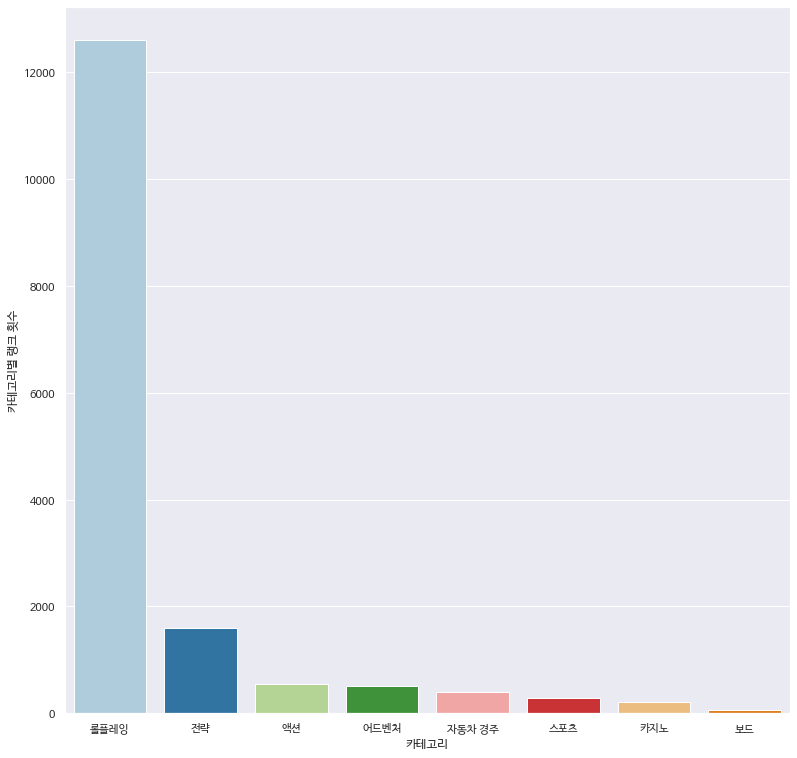

In [ ]:
plt.figure(figsize=(13, 13)) 
plt.rc('font', family='NanumBarunGothic')
sns.barplot(data=dfp, 
            x = "카테고리", 
            y = "카테고리별 랭크 횟수")

plt.show()

In [ ]:
dfg = df2.head(10).copy()
dfg

,날짜,순위,게임명,카테고리,게임별 랭크 횟수
0,2019-01-01,1,리니지M,롤플레잉,1620
1,2019-01-01,2,블레이드&소울 레볼루션,롤플레잉,963
2,2019-01-01,3,검은사막 모바일,롤플레잉,311
3,2019-01-01,4,리니지2 레볼루션,롤플레잉,708
4,2019-01-01,5,뮤오리진2,롤플레잉,133
5,2019-01-01,6,브롤스타즈,액션,370
6,2019-01-01,7,"왕이되는자 - 서민에서 왕까지, 세상을 흔드는 자",롤플레잉,88
7,2019-01-01,8,에픽세븐,롤플레잉,23
8,2019-01-01,9,세븐나이츠,롤플레잉,38
9,2019-01-01,10,신명,롤플레잉,110


In [ ]:
dfg_p = dfg.stb.freq(['게임명'], value='게임별 랭크 횟수')
dfg_p

,게임명,게임별 랭크 횟수,percent,cumulative_게임별 랭크 횟수,cumulative_percent
0,리니지M,1620,37.1,1620,37.1
1,블레이드&소울 레볼루션,963,22.1,2583,59.2
2,리니지2 레볼루션,708,16.2,3291,75.4
3,브롤스타즈,370,8.5,3661,83.9
4,검은사막 모바일,311,7.1,3972,91.0
5,뮤오리진2,133,3.0,4105,94.1
6,신명,110,2.5,4215,96.6
7,"왕이되는자 - 서민에서 왕까지, 세상을 흔드는 자",88,2.0,4303,98.6
8,세븐나이츠,38,0.9,4341,99.5
9,에픽세븐,23,0.5,4364,100.0


In [ ]:
dfg_p = dfg_p.drop('cumulative_게임별 랭크 횟수', axis=1)
dfg_p.head()

,게임명,게임별 랭크 횟수,percent,cumulative_percent
0,리니지M,1620,37.1,37.1
1,블레이드&소울 레볼루션,963,22.1,59.2
2,리니지2 레볼루션,708,16.2,75.4
3,브롤스타즈,370,8.5,83.9
4,검은사막 모바일,311,7.1,91.0


In [ ]:
dfg_p = dfg_p.drop('cumulative_percent', axis=1)
dfg_p.head()

,게임명,게임별 랭크 횟수,percent
0,리니지M,1620,37.1
1,블레이드&소울 레볼루션,963,22.1
2,리니지2 레볼루션,708,16.2
3,브롤스타즈,370,8.5
4,검은사막 모바일,311,7.1


In [ ]:
pd.options.display.float_format = '{:.1f}'.format
dfgp = dfg_p.rename(columns={'percent':'비율'})
dfgp

,게임명,게임별 랭크 횟수,비율
0,리니지M,1620,37.1
1,블레이드&소울 레볼루션,963,22.1
2,리니지2 레볼루션,708,16.2
3,브롤스타즈,370,8.5
4,검은사막 모바일,311,7.1
5,뮤오리진2,133,3.0
6,신명,110,2.5
7,"왕이되는자 - 서민에서 왕까지, 세상을 흔드는 자",88,2.0
8,세븐나이츠,38,0.9
9,에픽세븐,23,0.5


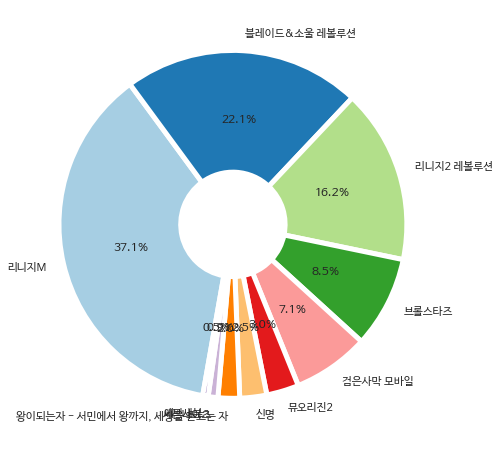

In [ ]:
sns.set_palette("Paired")
plt.figure(figsize=(15, 8)) 
plt.rc('font', family='NanumBarunGothic')
ratio = [37.1, 22.1, 16.2, 8.5, 7.1, 3.0, 2.5, 2.0, 0.9, 0.5]
labels = ["리니지M", "블레이드&소울 레볼루션", "리니지2 레볼루션", "브롤스타즈", 
          "검은사막 모바일", "뮤오리진2", "신명", "왕이되는자 - 서민에서 왕까지, 세상을 흔드는 자", 
          "세븐나이츠", "에픽세븐"]
#colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
plt.show()

<Figure size 3600x576 with 0 Axes>

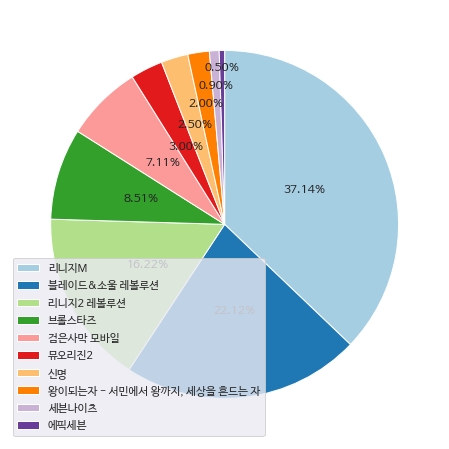

In [ ]:
plt.figure(figsize=(50, 8)) 
 
## 데이터 준비
#colors = ['red','yellow','purple','burlywood','lightcoral'] ## 색상
labels =  ["리니지M", "블레이드&소울 레볼루션", "리니지2 레볼루션", "브롤스타즈", 
          "검은사막 모바일", "뮤오리진2", "신명", "왕이되는자 - 서민에서 왕까지, 세상을 흔드는 자", 
          "세븐나이츠", "에픽세븐"] ## 라벨
frequency = [37.1, 22.1, 16.2, 8.5, 7.1, 3.0, 2.5, 2.0, 0.9, 0.5] ## 빈도
 
## 데이터 라벨, 빈도수, 색상을 빈도수를 기준으로 정렬해야한다.
labels_frequency = zip(labels,frequency) 
labels_frequency = sorted(labels_frequency,key=lambda x: x[1],reverse=True)
 
sorted_labels = [x[0] for x in labels_frequency] ## 정렬된 라벨
sorted_frequency = [x[1] for x in labels_frequency] ## 정렬된 빈도수
#sorted_colors = [x[2] for x in labels_frequency] ## 정렬된 색상
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(sorted_frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False ## 시계방향으로 그려짐
       #colors = sorted_colors, ## 색상 지정
       )
 
total = np.sum(frequency) ## 빈도수 합
 
threshold = 5
sum_pct = 0 ## 퍼센티지
count_less_5pct = 0 ## 5%보다 작은 라벨의 개수
spacing = 0.1
for i,l in enumerate(sorted_labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 파이의 중심 좌표
    
    ## 비율 상한선보다 작은 것들은 계단형태로 만든다.
    if sorted_frequency[i]/total*100 < threshold:
        x = (r/2+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        count_less_5pct += 1
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
    
    ## 퍼센티지 출력
    if i < len(labels) - 1:
        sum_pct += float(f'{sorted_frequency[i]/total*100:.2f}')
        ax.text(x,y,f'{sorted_frequency[i]/total*100:.2f}%',ha='center',va='center',fontsize=12)
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center',fontsize=12)
 
plt.legend(pie[0],sorted_labels) ## 범례
plt.show()

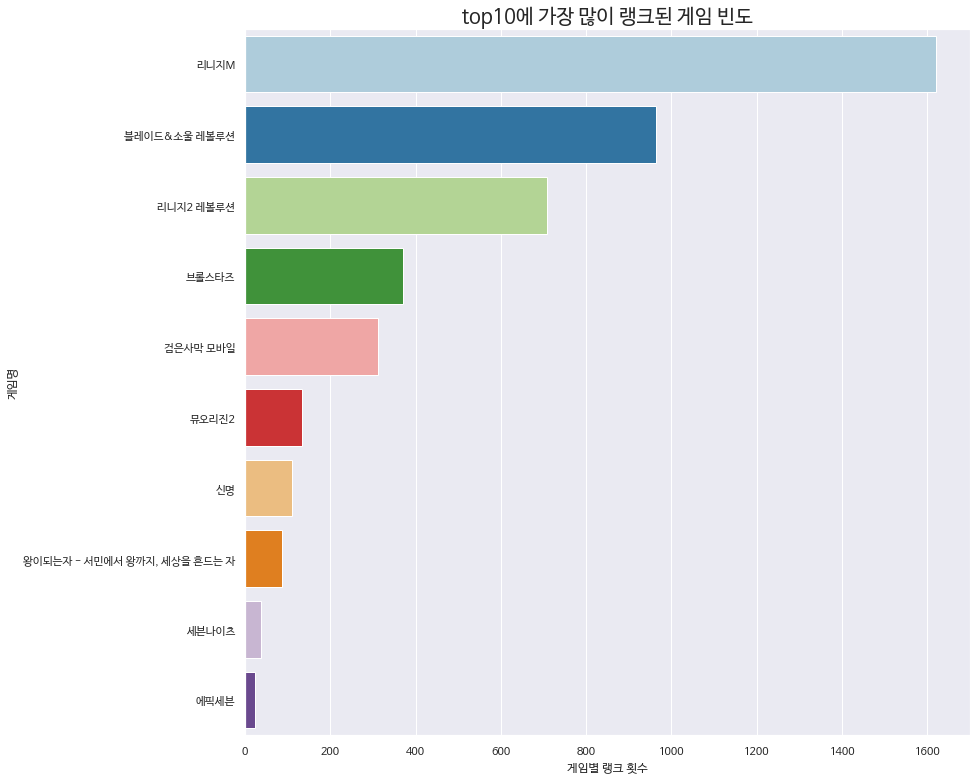

In [ ]:
plt.figure(figsize=(13, 13)) 
plt.rc('font', family='NanumBarunGothic')
sns.barplot(data=dfgp, 
            y = "게임명", 
            x = "게임별 랭크 횟수")

plt.title("top10에 가장 많이 랭크된 게임 빈도", size=20)

plt.show()